## Домашнее задание №4

***

### Медведев Вальдемар Сергеевич

***

### Классификация

Вам предложен набор с признаками съедобных и несъедобных грибов.  
Набор разбит на две части:  
- тренировочный griby_train.csv
- тестовый griby_test.csv

**Задача:**  
1. загрузить данные
2. провести разведочный анализ данных:
    * определить количество признаков
    * определить тип признаков
    * проверить на наличие пропущенных значений
    * визуализировать данные - распределение по категориям для съедобных и несъедобных грибов
    * построить графики с помощью какого-либо из методов снижения размерности, например, метода главных компонент
3. построить классификатор, который как можно более точно предсказывает съедобность грибов на основе предложенных признаков с помощью:  
    * логистической регрессии
    * метода опорных векторов (для SVM важно проводить подбор гиперпараметров)
    * решающего дерева (и визуализировать дерево)
    * градиентного бустинга
4. для метода опорных векторов провести подбор оптимальных параметров
5. оценить качество полученных моделей с использованием тестового набора (accuracy, ROC AUC), построить графики для визуализации качества предсказаний 
6. оценить важность признаков
    
Чтобы получить 5 баллов, достаточно выполнить пункты 1 и 2, построить классификатор хотя бы с помощью одного метода и выполнить пункт 5.  
Чтобы получить все 8 баллов, нужно выполнить все пункты заданий 1-6.  
Нужно быть готовым ответить на вопросы по вашему варианту решения.

Задание сдавать в виде jupyter-ноутбуков (\*.ipynb) или в виде скрипта в формате \*.py  

**ВАЖНО!!!**
- Код должен быть рабочим.  
- Помните про воспроизводимость &mdash; фиксируйте random-state везде, где необходимо.  
- Помните про переобучение! ***Обучаться на всем наборе данных, включая тестовый &mdash; плохая идея, качество ваших предсказаний я буду проверять на другом наборе данных! ***


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import seaborn as sns # библиотека для построения графиков

from sklearn import preprocessing, decomposition, manifold, model_selection, pipeline, cluster, datasets, mixture, metrics

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

from sklearn.svm import LinearSVC, SVC

from IPython.display import Image

%matplotlib inline 

### 1. Загрузка данных

In [2]:
## read test and train datasets:
data_train     = pd.read_csv("/home/vovademar/NSU/3course/MMO/HW4/Вальдемар Сергеевич Медведев - griby_train.txt")
data_hold_out  = pd.read_csv("/home/vovademar/NSU/3course/MMO/HW4/Вальдемар Сергеевич Медведев - griby_test.txt")
data_train

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,flat,scaly,brown,no,spicy,free,close,narrow,buff,...,silky,white,pink,partial,white,one,evanescent,white,several,leaves
1,poisonous,convex,scaly,yellow,no,foul,free,close,broad,gray,...,silky,buff,pink,partial,white,one,large,chocolate,several,grasses
2,edible,convex,fibrous,brown,bruises,none,free,close,broad,pink,...,smooth,pink,gray,partial,white,one,pendant,brown,solitary,woods
3,poisonous,convex,smooth,red,no,spicy,free,close,narrow,buff,...,silky,pink,pink,partial,white,one,evanescent,white,several,woods
4,edible,convex,fibrous,red,bruises,none,free,close,broad,brown,...,smooth,white,gray,partial,white,one,pendant,black,solitary,woods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,poisonous,convex,scaly,red,no,fishy,free,close,narrow,buff,...,smooth,white,white,partial,white,one,evanescent,white,several,leaves
2100,poisonous,flat,smooth,white,bruises,foul,free,close,broad,pink,...,smooth,white,white,partial,white,one,pendant,chocolate,scattered,grasses
2101,poisonous,convex,smooth,brown,no,fishy,free,close,narrow,buff,...,silky,pink,pink,partial,white,one,evanescent,white,several,leaves
2102,edible,convex,fibrous,white,no,none,free,crowded,broad,pink,...,smooth,white,white,partial,white,one,evanescent,brown,scattered,grasses


In [3]:
data_hold_out

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,edible,convex,smooth,brown,no,none,attached,close,broad,orange,...,smooth,orange,orange,partial,orange,one,pendant,brown,clustered,leaves
1,poisonous,flat,fibrous,yellow,no,none,free,close,narrow,white,...,scaly,white,yellow,partial,white,one,evanescent,white,several,woods
2,edible,flat,scaly,brown,bruises,anise,free,close,broad,pink,...,scaly,white,white,partial,white,one,pendant,brown,solitary,grasses
3,edible,convex,scaly,gray,bruises,none,free,close,broad,white,...,smooth,white,pink,partial,white,one,pendant,black,several,woods
4,edible,bell,scaly,yellow,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,edible,convex,fibrous,brown,bruises,none,free,close,broad,white,...,smooth,white,gray,partial,white,one,pendant,black,solitary,woods
943,edible,convex,smooth,brown,no,none,free,crowded,broad,brown,...,fibrous,white,white,partial,white,one,evanescent,black,scattered,grasses
944,poisonous,flat,fibrous,yellow,no,foul,free,close,broad,chocolate,...,silky,buff,brown,partial,white,one,large,chocolate,several,grasses
945,poisonous,convex,smooth,brown,no,spicy,free,close,narrow,buff,...,smooth,white,white,partial,white,one,evanescent,white,several,woods


### 2. Разведочный анализ данных

In [4]:
## проверка на наличие пропущенных значений
print (f"check data_train\n{data_train.isna().sum()}")

check data_train
class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64


In [5]:
print (f"check data_hold_out\n{data_hold_out.isna().sum()}")

check data_hold_out
class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64


In [6]:
## сколько в датасете параметров? Признак class является целевым.
print(f"data_train: {data_train.shape}")
print(f"data_hold_out: {data_hold_out.shape}")

data_train: (2104, 23)
data_hold_out: (947, 23)


In [7]:
## для каждого признака вывести количество наблюдений для каждой категории
## например, с помощью метода value_counts
for col in data_train.columns:
    print(col)
    print(data_train[col].value_counts())
    print()

class
edible       1133
poisonous     971
Name: class, dtype: int64

cap_shape
convex     974
flat       807
knobbed    198
bell       116
sunken       7
conical      2
Name: cap_shape, dtype: int64

cap_surface
scaly      801
smooth     680
fibrous    623
Name: cap_surface, dtype: int64

cap_color
brown       569
gray        508
red         350
yellow      298
white       258
buff         51
pink         45
cinnamon     15
purple        5
green         5
Name: cap_color, dtype: int64

bruises
no         1256
bruises     848
Name: bruises, dtype: int64

odor
none        944
foul        536
spicy       141
fishy       140
anise       109
almond      109
pungent      61
creosote     49
musty        15
Name: odor, dtype: int64

gill_attachment
free        2045
attached      59
Name: gill_attachment, dtype: int64

gill_spacing
close      1699
crowded     405
Name: gill_spacing, dtype: int64

gill_size
broad     1488
narrow     616
Name: gill_size, dtype: int64

gill_color
buff         413


In [8]:
## для каждого признака вывести количество наблюдений для каждой категории
## например, с помощью метода value_counts
for col in data_hold_out.columns:
    print(col)
    print(data_hold_out[col].value_counts())
    print()

class
edible       486
poisonous    461
Name: class, dtype: int64

cap_shape
convex     417
flat       387
knobbed    105
bell        38
Name: cap_shape, dtype: int64

cap_surface
scaly      387
smooth     314
fibrous    245
grooves      1
Name: cap_surface, dtype: int64

cap_color
brown       272
gray        242
red         175
yellow      117
white       103
pink         19
buff         11
cinnamon      5
purple        2
green         1
Name: cap_color, dtype: int64

bruises
no         586
bruises    361
Name: bruises, dtype: int64

odor
none        413
foul        252
spicy        73
fishy        71
almond       47
anise        38
pungent      27
creosote     19
musty         7
Name: odor, dtype: int64

gill_attachment
free        916
attached     31
Name: gill_attachment, dtype: int64

gill_spacing
close      781
crowded    166
Name: gill_spacing, dtype: int64

gill_size
broad     644
narrow    303
Name: gill_size, dtype: int64

gill_color
buff         221
pink         174
brown   

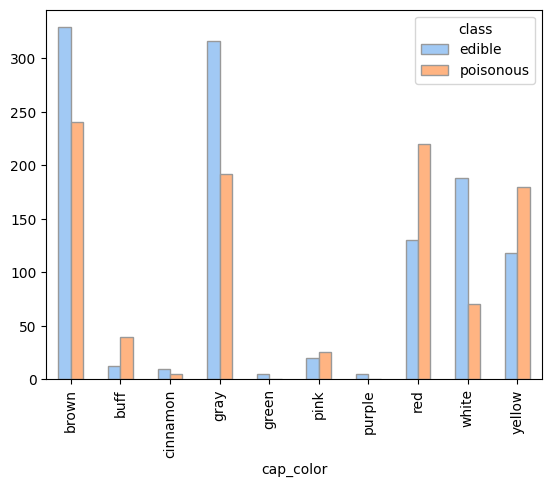

In [9]:
## для визуализации распределения наблюдений по категориям
## можно воспользоваться вот таким примером
data_train[['cap_color','class']].groupby(['cap_color', 'class']).size().unstack().plot.bar(edgecolor=".6", #log= 'y',
                                                                                            color = sns.color_palette('pastel'));



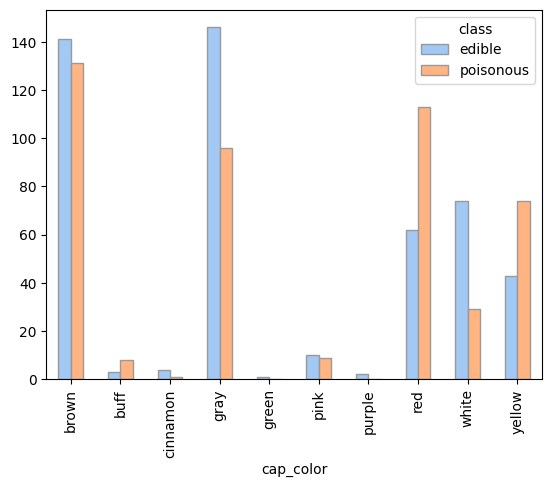

In [10]:
data_hold_out[['cap_color','class']].groupby(['cap_color', 'class']).size().unstack().plot.bar(edgecolor=".6", #log= 'y',
                                                                                            color = sns.color_palette('pastel'));

In [11]:
## необходимо преобразовать признаки.
## используйте dummy-кодирование / one-hot-кодирование
## например, с помощью sklearn.preprocessing.OneHotEncoder или pandas.get_dummies
## NB! Необходимо убедиться, что в наборе train есть все варианты значений!

## пример кодирования признака cap_color
## с помощью pandas.get_dummies
data_train_X = pd.get_dummies(data_train.drop('class', axis=1))

data_hold_out_X = pd.get_dummies(data_hold_out.drop('class', axis=1))

data_train_X, data_hold_out_X = data_train_X.align(data_hold_out_X, join='outer', axis=1, fill_value=0)


In [12]:
## проверьте размерность ваших данных!!! Если количество колонок не совпадает - нужно это исправить...
print(f"data_train_X: {data_train_X.shape}")
print(f"data_hold_out_X: {data_hold_out_X.shape}")

data_train_X: (2104, 117)
data_hold_out_X: (947, 117)


In [13]:
data_train_X.corr()

,bruises_bruises,bruises_no,cap_color_brown,cap_color_buff,cap_color_cinnamon,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,...,stalk_surface_above_ring_smooth,stalk_surface_below_ring_fibrous,stalk_surface_below_ring_scaly,stalk_surface_below_ring_silky,stalk_surface_below_ring_smooth,veil_color_brown,veil_color_orange,veil_color_white,veil_color_yellow,veil_type_partial
bruises_bruises,1.000000,-1.000000,-0.015992,0.191817,-0.035076,-0.089989,-0.040103,0.039269,-0.040103,-0.028790,...,0.568556,-0.135951,0.100861,-0.499668,0.494411,-0.088263,-0.095426,0.132086,-0.017918,NaN
bruises_no,-1.000000,1.000000,0.015992,-0.191817,0.035076,0.089989,0.040103,-0.039269,0.040103,0.028790,...,-0.568556,0.135951,-0.100861,0.499668,-0.494411,0.088263,0.095426,-0.132086,0.017918,NaN
cap_color_brown,-0.015992,0.015992,1.000000,-0.095961,-0.051592,-0.343493,-0.029715,-0.090008,-0.029715,-0.271970,...,0.129403,-0.036083,0.104483,-0.150903,0.118516,0.176430,0.190749,-0.257202,-0.013276,NaN
cap_color_buff,0.191817,-0.191817,-0.095961,1.000000,-0.013356,-0.088921,-0.007693,-0.023301,-0.007693,-0.070406,...,0.036923,0.129171,-0.030093,-0.095845,0.024713,-0.016930,-0.018304,0.025336,-0.003437,NaN
cap_color_cinnamon,-0.035076,0.035076,-0.051592,-0.013356,1.000000,-0.047807,-0.004136,-0.012527,-0.004136,-0.037853,...,-0.040790,0.034905,0.137155,-0.051529,-0.024863,-0.009102,-0.009841,0.013622,-0.001848,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
veil_color_brown,-0.088263,0.088263,0.176430,-0.016930,-0.009102,-0.060602,-0.005243,-0.015880,-0.005243,-0.047984,...,0.081944,-0.032756,-0.020509,-0.065321,0.085928,1.000000,-0.012475,-0.668219,-0.002342,NaN
veil_color_orange,-0.095426,0.095426,0.190749,-0.018304,-0.009841,-0.065521,-0.005668,-0.017169,-0.005668,-0.051878,...,0.088595,-0.035414,-0.022173,-0.070623,0.092902,-0.012475,1.000000,-0.722454,-0.002532,NaN
veil_color_white,0.132086,-0.132086,-0.257202,0.025336,0.013622,0.090692,0.007846,0.023765,0.007846,0.071808,...,-0.116341,0.049019,0.014227,0.097754,-0.122374,-0.668219,-0.722454,1.000000,-0.135652,NaN
veil_color_yellow,-0.017918,0.017918,-0.013276,-0.003437,-0.001848,-0.012303,-0.001064,-0.003224,-0.001064,-0.009741,...,-0.028585,-0.006650,0.114212,-0.013260,-0.027260,-0.002342,-0.002532,-0.135652,1.000000,NaN


/tmp/ipykernel_134986/4203482628.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data_train_X.corr()>=0, figsize=(15,13));


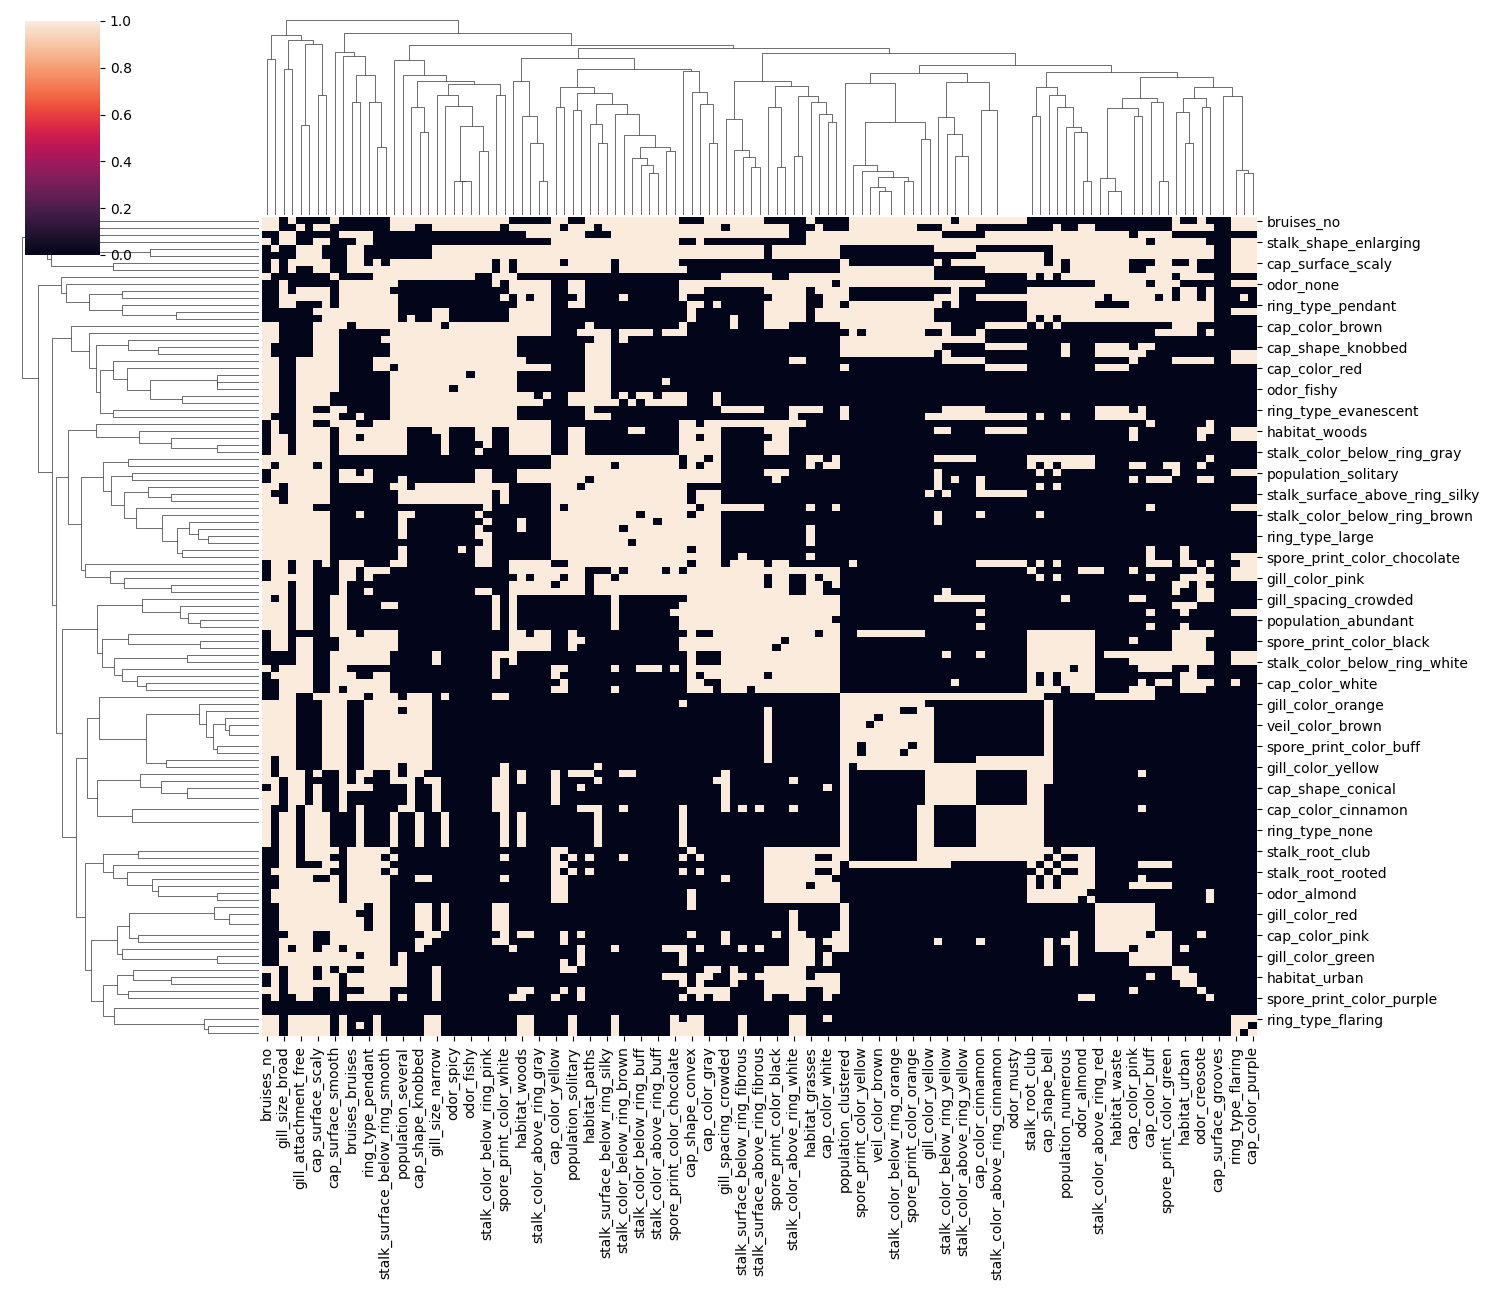

In [69]:
## интересно визуализировать наш набор данных с помощью seaborn.clustermap
## стоит отметить, что сходство/отличие образцов и признаков в нашем случае стоит оценивать с использованием метрики корреляции
## а, собственно, какой метрики?

## prepare for correlation matrix

sns.clustermap(data_train_X.corr()>=0, figsize=(15,13));




In [52]:
## импортируем следующие функции из scipy:
## pdist - для определения расстояний между объектами (возвращает в конденсированном виде)
## squareform - для превращения матрицы расстояний в квадратную (избыточную)
from scipy.spatial.distance import pdist, squareform

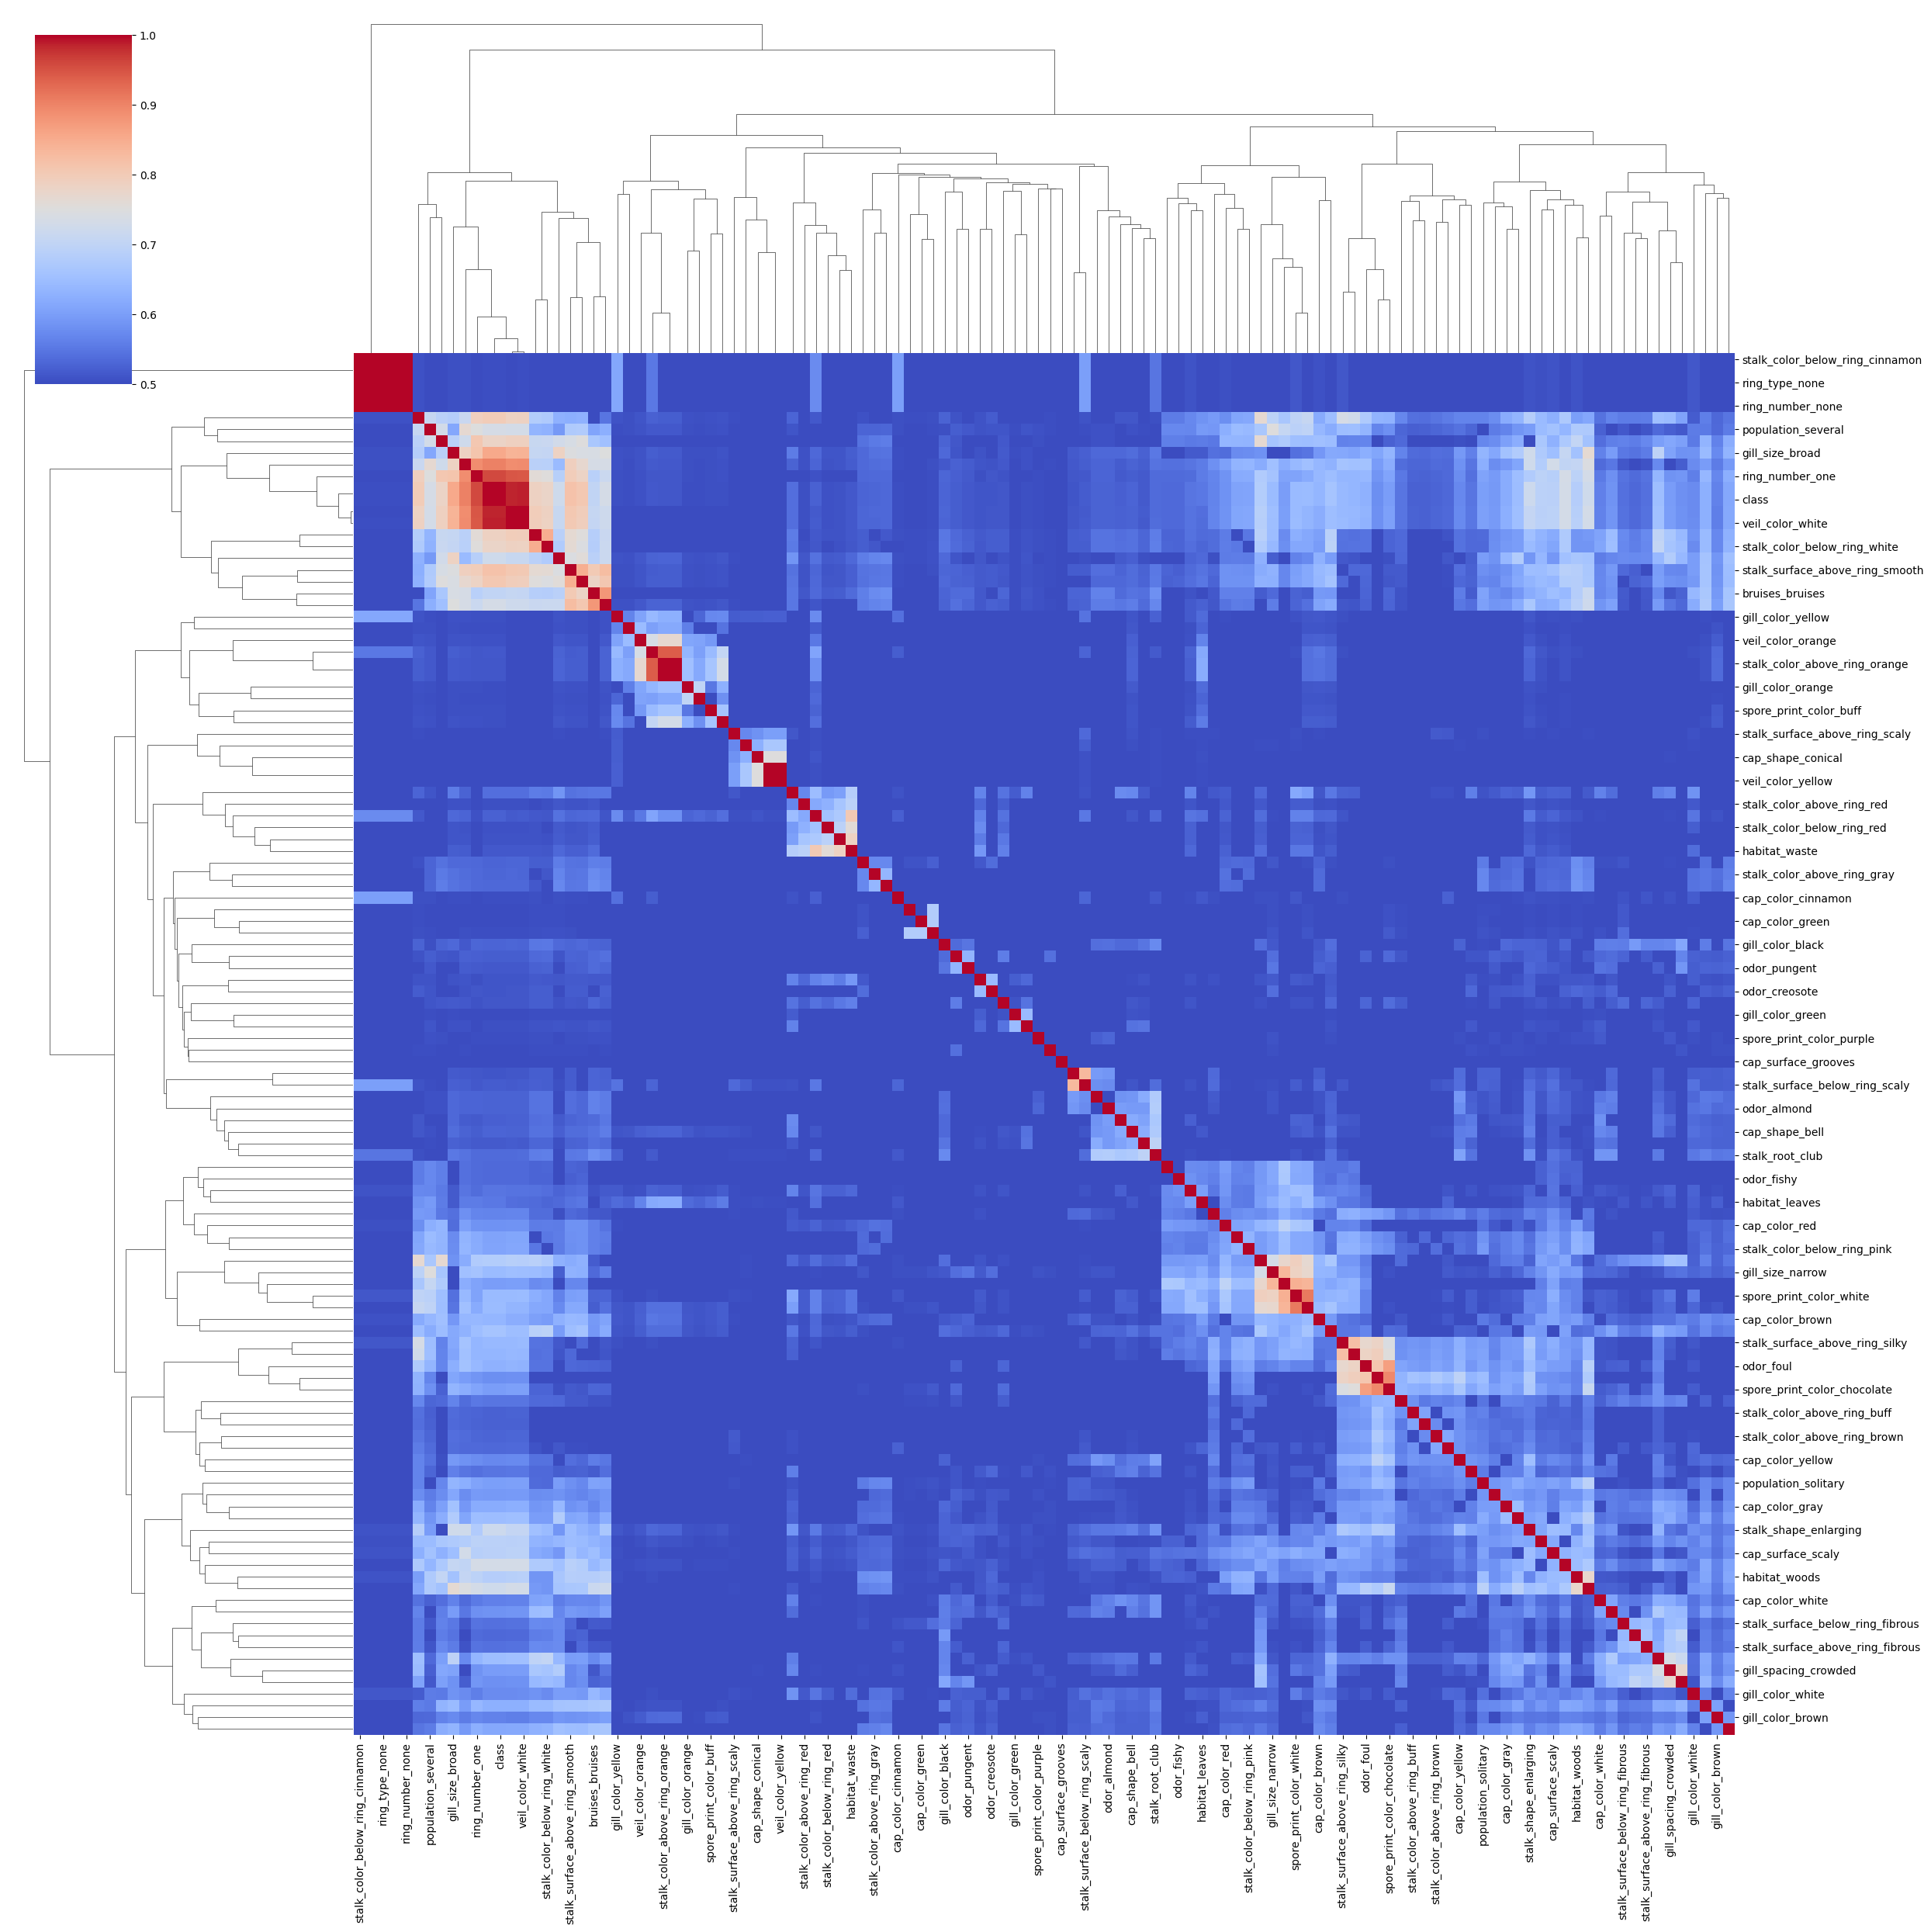

In [67]:
## Далее приведена информация из документации к scipy.spatial.distance
## можете попробовать посчитать матрицу сходства между признаками и визуализировать ее с помощью 
## seaborn.clustermap

## Computing distances over a large collection of vectors is inefficient for these functions. 
## Use pdist for this purpose.
## Distance functions between two numeric vectors u and v: 
##   braycurtis, canberra, chebyshev, cityblock, correlation, cosine, euclidean, jensenshannon, mahalanobis,
##   minkowski, seuclidean, sqeuclidean, wminkowski
## Distance functions between two boolean vectors (representing sets) u and v: 
##   dice, hamming, jaccard, kulsinski, rogerstanimoto, russellrao, sokalmichener, sokalsneath, yule

D = squareform(pdist(data_train_X.T.values, metric= 'dice'))#'your_method')) ## матрица расстояний
## необходимо найти матрицу сходства
## создать на ее основе pandas.DataFrame, причем задать значения индекса и колонок, 
## соответствующие новым трансформированным признакам из таблицы shrooms_trainX
Sim = pd.DataFrame(1/(1+D), index=data_train_X.columns, columns=data_train_X.columns)



## визуализируем полученную матрицу с помощью seaborn.clustermap

## для функции seaborn.clustermap лучше дополнительно задать следующие параметры:
## cmap = 'coolwarm', figsize = (25, 25));
sns.clustermap(Sim, cmap = 'coolwarm', figsize = (25, 25));

In [ ]:
## создадим numpy.array (или pandas.Series) с метками классов: 1 - edible, 0 - poisonous
y_train = <здесь должен быть ваш код>
y_test  = <здесь должен быть ваш код>

In [ ]:
## проведем снижение размерности наших данных с помощью PCA, MDS или другого метода
## теперь можно построить диаграмму рассеяния для наших данных в трехмерном пространстве
pca = <здесь должен быть ваш код>
scores = <здесь должен быть ваш код>
x, y, z = scores[:,0], scores[:,1], scores[:,2] # если scores -- numpy.array
#x, y, z = scores.iloc[:,0], scores.iloc[:,1], scores.iloc[:,2] # если scores -- pandas.DataFrame

class_cols = <здесь должен быть ваш код> # -- цвета, соответствующие меткам классов

from mpl_toolkits.mplot3d import Axes3D ## для построения 3D-графиков
fig = plt.figure(figsize = (9, 9)) ## зададим размер фигуры
ax = Axes3D(fig)

ax.scatter(x, y, z, color = class_cols) 

ax.view_init(30, 100) ## изменяя эти параметры вы меняете угол зрения
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


### 3. Построение классификатора с помощью:
* логистической регрессии

In [ ]:
## создадим пайплайн
## или построим модель без создания пайплайна
## используем кросс-валидацию
clf_lr = <здесь должен быть ваш код>

* метода опорных векторов (для SVM важно проводить подбор гиперпараметров)

In [ ]:
## создадим пайплайн
## или построим модель без создания пайплайна
## используем кросс-валидацию
## лучше всего воспользоваться GridSearchCV или RandomizedSearchCV для подбора гиперпараметров
clf_svc = <здесь должен быть ваш код>

* решающего дерева (и визуализировать дерево — необязательно)

In [ ]:
clf_dt = <здесь должен быть ваш код>

* градиентного бустинга (или RandomForestClassifier, ExtraTreesClassifier)

In [ ]:
xgbc = <здесь должен быть ваш код>

### 4. Подбор оптимальных параметров (для SVM)

In [ ]:
<здесь должен быть ваш код> ## Пример - в ноутбуке с последнего занятия.

### 5. Оценка качества полученных моделей с использованием тестового набора 
* Accuracy, ROC AUC, построить графики для визуализации качества предсказаний

In [ ]:
<здесь должен быть ваш код>

### 6. Оцените важность признаков

In [ ]:
<здесь должен быть ваш код>